In [ ]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [4]:
import yfinance as yf

In [5]:
df = yf.download('VGT','2012-01-01','2023-12-17')

[*********************100%%**********************]  1 of 1 completed


In [6]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,62.529999,62.840000,62.110001,62.230000,55.243591,162300
2012-01-04,62.160000,62.410000,61.700001,62.290001,55.296864,92900
2012-01-05,62.310001,62.860001,62.000000,62.750000,55.705223,127100
2012-01-06,62.820000,62.930000,62.439999,62.790001,55.740726,122000
2012-01-09,63.000000,63.000000,62.520000,62.790001,55.740726,107000
...,...,...,...,...,...,...
2023-12-11,466.010010,470.769989,465.100006,470.700012,469.925781,698600
2023-12-12,469.239990,473.579987,468.429993,473.510010,472.731171,343200
2023-12-13,474.679993,480.019989,473.250000,478.980011,478.192169,593100


In [7]:
df.shape

(3009, 6)

<function matplotlib.pyplot.show(close=None, block=None)>

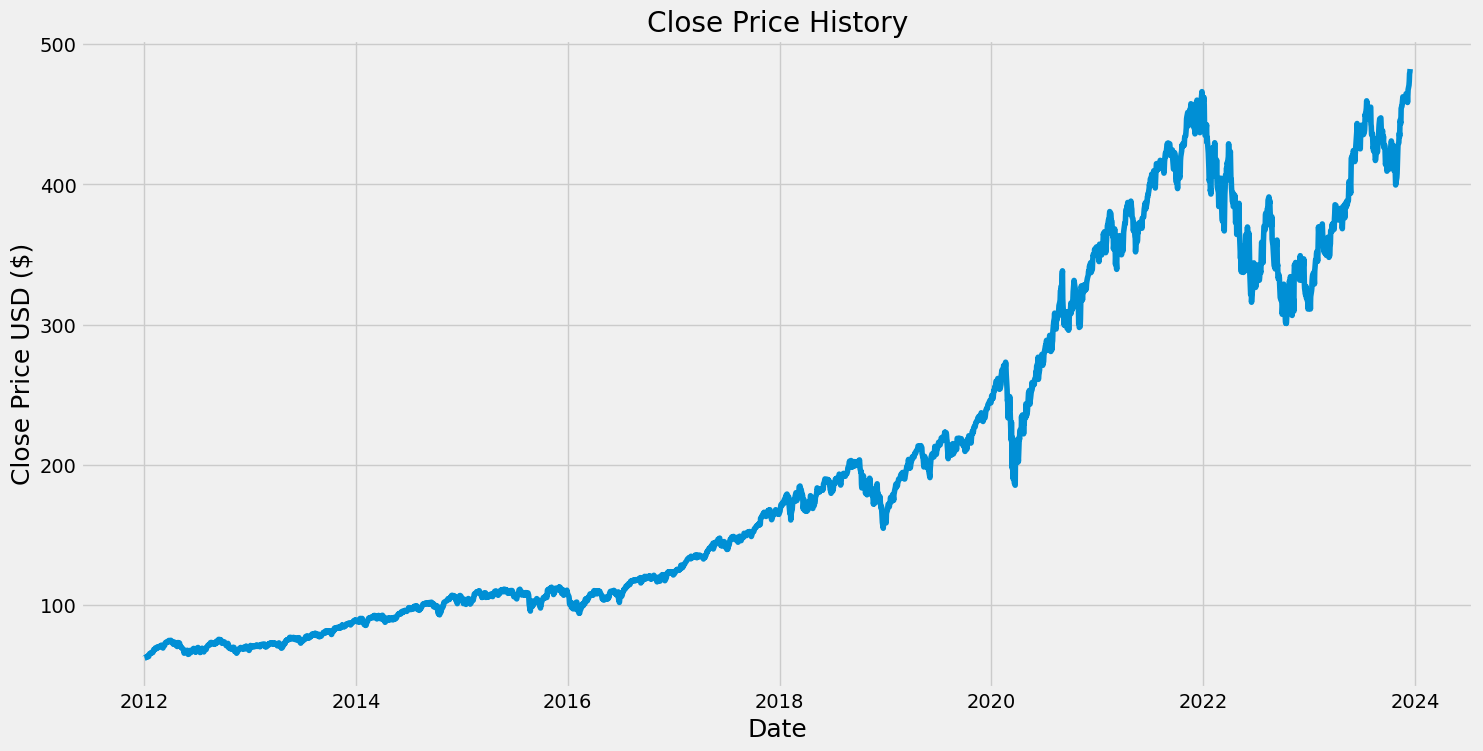

In [8]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show

In [9]:
data = df.filter(['Close'])
data

,Close
Date,
2012-01-03,62.230000
2012-01-04,62.290001
2012-01-05,62.750000
2012-01-06,62.790001
2012-01-09,62.790001
...,...
2023-12-11,470.700012
2023-12-12,473.510010
2023-12-13,478.980011


In [21]:
dataset = data.values
training_data_len = math.ceil(len(dataset)*0.8)
training_data_len


2408

In [11]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00000000e+00],
       [1.42863814e-04],
       [1.23812580e-03],
       ...,
       [9.92285554e-01],
       [9.94499875e-01],
       [1.00000000e+00]])

In [12]:
train_data = scaled_data[0:training_data_len, :]
train_data

array([[0.00000000e+00],
       [1.42863814e-04],
       [1.23812580e-03],
       ...,
       [8.39543764e-01],
       [8.28781630e-01],
       [8.29805446e-01]])

In [13]:
x_train = []
y_train = []


for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i,0])



In [14]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [16]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(2348, 60, 1)

In [18]:
model = Sequential()
model.add(LSTM(50, return_sequences= True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

In [19]:
model.compile(optimizer= 'adam', loss='mean_squared_error')

In [20]:
model.fit(x_train, y_train, batch_size=1, epochs=1)

2348/2348 [==============================] - 77s 31ms/step - loss: 0.0010


In [22]:
test_data = scaled_data[training_data_len - 60: , :]
x_test =[]
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])



In [23]:
x_test = np.array(x_test)

In [24]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

In [28]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
predictions

19/19 [==============================] - 0s 16ms/step


array([[431.76093],
       [432.5192 ],
       [433.1178 ],
       [433.47278],
       [433.88126],
       [434.3619 ],
       [435.08862],
       [435.80978],
       [436.37177],
       [436.4933 ],
       [436.33463],
       [436.2407 ],
       [436.35464],
       [436.6414 ],
       [436.6546 ],
       [436.02576],
       [435.41785],
       [435.35   ],
       [436.13257],
       [437.3606 ],
       [438.7474 ],
       [439.86414],
       [441.20956],
       [442.9284 ],
       [444.4189 ],
       [445.69144],
       [446.7441 ],
       [447.76422],
       [448.60593],
       [449.02734],
       [449.04858],
       [448.42795],
       [447.52454],
       [446.47955],
       [445.79953],
       [445.43445],
       [444.7354 ],
       [443.18054],
       [441.35336],
       [440.11237],
       [439.7991 ],
       [440.027  ],
       [440.1631 ],
       [439.00357],
       [437.12314],
       [434.76883],
       [432.9009 ],
       [430.47452],
       [428.58856],
       [427.4084 ],


In [29]:
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

21.090491728060655

<ipython-input-32-07c8a224b21a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


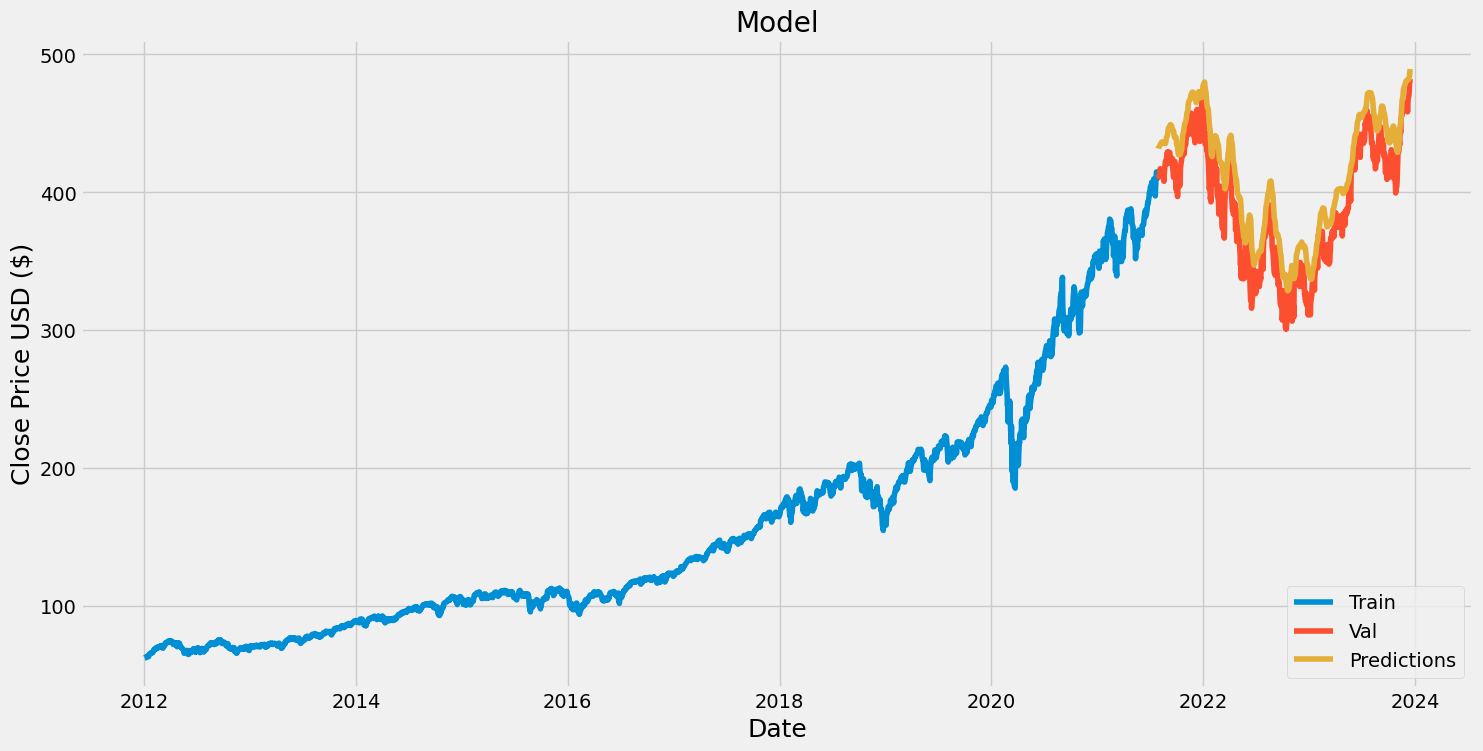

In [32]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))

plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc = 'lower right')
plt.show()

In [33]:
valid

,Close,Predictions
Date,,
2021-07-29,412.769989,431.760925
2021-07-30,412.209991,432.519196
2021-08-02,411.190002,433.117798
2021-08-03,413.480011,433.472778
2021-08-04,414.510010,433.881256
...,...,...
2023-12-11,470.700012,482.181915
2023-12-12,473.510010,483.289490
2023-12-13,478.980011,484.846313
